In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('CC.csv')

2display the top rows of the dataset

In [4]:

print(df.head())


   Unnamed: 0  Time        V1        V2        V3        V4        V5  \
0           1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           2   0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
2           3   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3           4   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           5   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8  ...       V21       V22       V23       V24  \
0  0.462388  0.239599  0.098698  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288 -0.339846   
2  1.800499  0.791461  0.247676  ...  0.247998  0.771679  0.909412 -0.689281   
3  1.247203  0.237609  0.377436  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.095921  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

dispaly the last few rows of the dataset

In [5]:
df.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


find the shape of the dataset

In [6]:
df.shape

(284807, 32)

In [7]:
# Basic statistics
print(df.describe())

          Unnamed: 0           Time            V1            V2            V3  \
count  284807.000000  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean   142404.000000   94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15   
std     82216.843396   47488.145955  1.958696e+00  1.651309e+00  1.516255e+00   
min         1.000000       0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01   
25%     71202.500000   54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01   
50%    142404.000000   84692.000000  1.810880e-02  6.548556e-02  1.798463e-01   
75%    213605.500000  139320.500000  1.315642e+00  8.037239e-01  1.027196e+00   
max    284807.000000  172792.000000  2.454930e+00  2.205773e+01  9.382558e+00   

                 V4            V5            V6            V7            V8  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.074095e-15  9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16   
std    1.415869e+00  1.380247e+00

In [8]:

print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non

In [9]:
data_types = df.dtypes

# Display the data types
print("Data types of the features in the dataset:")
print(data_types)

Data types of the features in the dataset:
Unnamed: 0      int64
Time          float64
V1            float64
V2            float64
V3            float64
V4            float64
V5            float64
V6            float64
V7            float64
V8            float64
V9            float64
V10           float64
V11           float64
V12           float64
V13           float64
V14           float64
V15           float64
V16           float64
V17           float64
V18           float64
V19           float64
V20           float64
V21           float64
V22           float64
V23           float64
V24           float64
V25           float64
V26           float64
V27           float64
V28           float64
Amount        float64
Class           int64
dtype: object


In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print("Categorical columns in the dataset:")
print(categorical_columns)

# Alternatively, you can display the data from these columns
print("\nData in categorical columns:")
print(df[categorical_columns].head())

Categorical columns in the dataset:
Index([], dtype='object')

Data in categorical columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [12]:
# Display all columns in the dataset
print("\nAll columns in the dataset:")
print(df.columns.tolist())  # List of all column names


All columns in the dataset:
['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


check the null values in the dataset

In [13]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


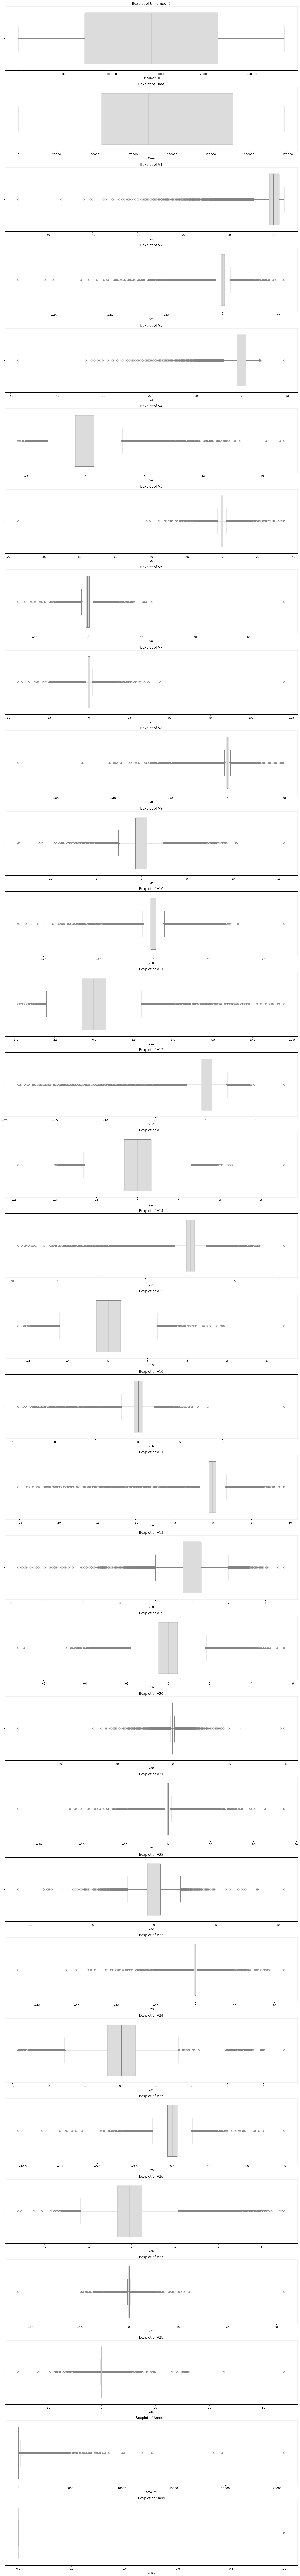

In [5]:
#detecting outlaers

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, len(numerical_features) * 4))
for i, column in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.boxplot(x=df[column], palette="coolwarm")
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:  # Only apply to numerical columns
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers_iqr(df)
for column, outlier_values in outliers.items():
    print(f'Outliers detected in {column}:')
    print(outlier_values)


Outliers detected in Unnamed: 0:
Series([], Name: Unnamed: 0, dtype: int64)
Outliers detected in Time:
Series([], Name: Time, dtype: float64)
Outliers detected in V1:
18        -5.401258
85        -4.575093
140       -5.101877
146       -5.285971
164       -6.093248
            ...    
284631    -5.459612
284649   -11.946976
284772    -6.713826
284795   -12.516732
284802   -11.881118
Name: V1, Length: 7062, dtype: float64
Outliers detected in V2:
18        -5.450148
85        -4.429184
89        -4.146007
146        4.847323
164      -12.114213
            ...    
284727    -2.799345
284728     3.216851
284732    -3.116353
284795    10.187818
284802    10.071785
Name: V2, Length: 13526, dtype: float64
Outliers detected in V3:
164       -5.694973
958        4.017561
1632     -12.389545
4023       4.101716
5257      -4.075931
            ...    
284610    -5.138427
284631    -5.127471
284649    -8.006237
284795    -8.476671
284802    -9.834783
Name: V3, Length: 3363, dtype: float64
Outli

In [7]:
import numpy as np

# Function to remove outliers based on Z-score
def remove_outliers(df, columns, threshold=3):
    """
    Removes rows from the DataFrame where any of the specified columns have a Z-score above the given threshold.
    
    Parameters:
    df (DataFrame): The DataFrame from which to remove outliers.
    columns (list): List of column names to check for outliers.
    threshold (float): The Z-score threshold to use for identifying outliers.
    
    Returns:
    DataFrame: A DataFrame with outliers removed.
    """
    z_scores = np.abs(df[columns].apply(lambda x: (x - x.mean()) / x.std()))
    df_clean = df[(z_scores < threshold).all(axis=1)]
    return df_clean

# Example usage:
columns_to_check = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']  # Add other columns as necessary
df_clean = remove_outliers(df, columns_to_check)

print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")


Original dataset size: (284807, 32)
Cleaned dataset size: (248171, 32)


In [9]:
import pandas as pd

# Assuming `remove_outliers` is a function that removes outliers
# and `df` is your original dataset

# Step 1: Remove outliers from the dataset
cleaned_df = remove_outliers(df, columns_to_check)

# Step 2: Create a new DataFrame with the cleaned data
cleaned_data = pd.DataFrame(cleaned_df)

# Display the cleaned DataFrame
print(cleaned_data.head())


   Unnamed: 0  Time        V1        V2        V3        V4        V5  \
0           1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           2   0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
3           4   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           5   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   
5           6   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987   

         V6        V7        V8  ...       V21       V22       V23       V24  \
0  0.462388  0.239599  0.098698  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288 -0.339846   
3  1.247203  0.237609  0.377436  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.095921  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458  0.141267   
5 -0.029728  0.476201  0.260314  ... -0.208254 -0.559825 -0.026398 -0.371427   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

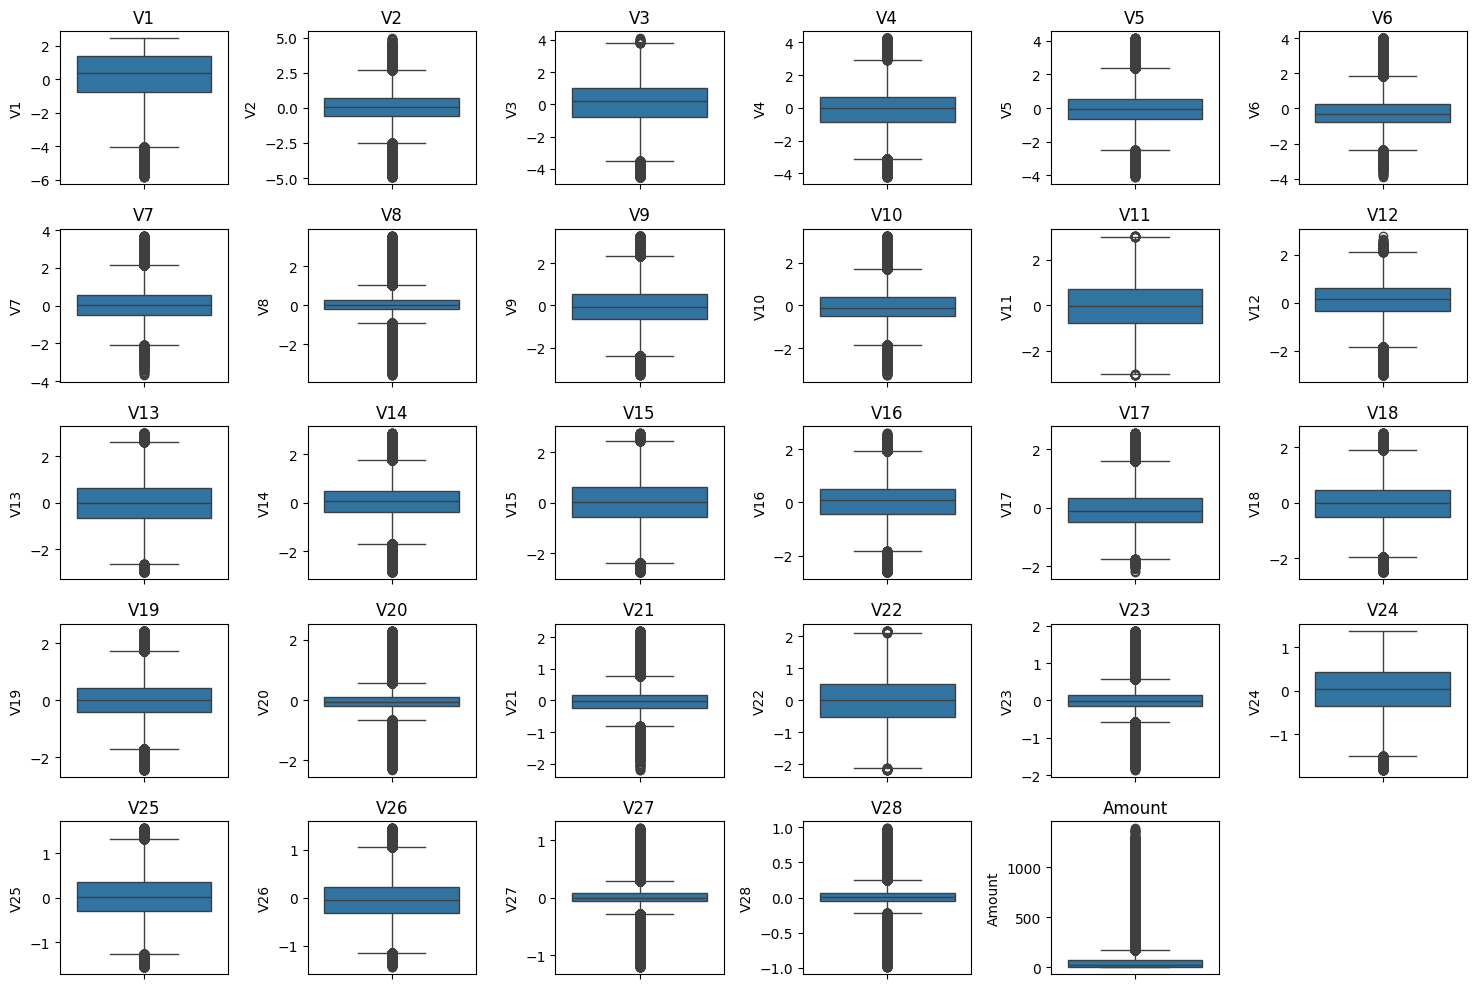

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing all features to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(cleaned_data.columns[2:-1], 1):  # Skip 'Unnamed: 0', 'Time', and 'Class'
    plt.subplot(5, 6, i)  # Adjust number of rows and columns as needed
    sns.boxplot(y=cleaned_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [11]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(cleaned_data.iloc[:, 2:-1])  # Exclude non-feature columns
abs_z_scores = abs(z_scores)

# Set a threshold
threshold = 3
outliers = (abs_z_scores > threshold).any(axis=1)

# Display the number of outliers
print(f"Number of outlier rows based on Z-score method: {outliers.sum()}")


Number of outlier rows based on Z-score method: 45294


In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = cleaned_data.iloc[:, 2:-1].quantile(0.25)
Q3 = cleaned_data.iloc[:, 2:-1].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((cleaned_data.iloc[:, 2:-1] < lower_bound) | (cleaned_data.iloc[:, 2:-1] > upper_bound)).any(axis=1)

# Display the number of outliers
print(f"Number of outlier rows based on IQR method: {outliers_iqr.sum()}")


Number of outlier rows based on IQR method: 116207


In [21]:
outlier_iqr_indices = np.where(outliers_iqr)[0]
outlier_iqr_samples = cleaned_data.iloc[outlier_iqr_indices].sample(n=10)  # Display 10 random outlier samples
print(outlier_iqr_samples)


        Unnamed: 0      Time        V1        V2        V3        V4  \
201959      201960  134113.0 -1.362961 -1.879729  2.146080  0.649710   
147643      147644   88790.0 -0.207324  0.978446  1.613896  2.734086   
188124      188125  127826.0 -1.455323  1.795071 -1.627436 -1.029092   
31290        31291   36305.0  1.186717 -0.175977  0.128262  0.355999   
152903      152904   97559.0 -0.280826  0.982834 -0.261328 -0.357156   
13874        13875   24632.0 -0.485018 -0.087851  1.586538  0.100256   
157219      157220  109724.0  0.044687  0.999103  0.441595 -0.393829   
138761      138762   82832.0 -1.135202  0.479624  1.505824 -1.735973   
277524      277525  167694.0  1.707235 -0.187561  0.123768  3.921527   
271775      271776  164741.0  1.775550 -0.219703 -1.564654  0.431579   

              V5        V6        V7        V8  ...       V21       V22  \
201959 -0.298425  0.114081 -0.894893  0.457205  ...  0.453514  1.180878   
147643  0.099837  1.011611 -0.024145  0.367341  ...  0.11

In [49]:
# Display class counts
class_counts = cleaned_data['Class'].value_counts()
print(class_counts)

Class
0    248122
1        49
Name: count, dtype: int64


In [81]:

cleaned_data.fillna(cleaned_data.median(), inplace=True)  # Impute with median


In [44]:
# Example of capping outliers
for column in cleaned_data.columns[2:-1]:  # Adjust as needed
    Q1 = cleaned_data[column].quantile(0.25)
    Q3 = cleaned_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_data[column] = np.where(cleaned_data[column] < lower_bound, lower_bound,
                                    np.where(cleaned_data[column] > upper_bound, upper_bound, 
                                             cleaned_data[column]))


In [45]:
from scipy import stats

# Ensure all values are positive before Box-Cox
for col in cleaned_data.select_dtypes(include=[np.number]).columns:
    if cleaned_data[col].min() <= 0:
        shift_value = abs(cleaned_data[col].min()) + 1
        cleaned_data[col] += shift_value  # Shift to make all values positive

# Apply Box-Cox transformation
for col in cleaned_data.select_dtypes(include=[np.number]).columns:
    cleaned_data[col], _ = stats.boxcox(cleaned_data[col])  # Apply Box-Cox transformation


ValueError: Data must not be constant.

In [28]:
print(cleaned_data.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'z_score'],
      dtype='object')


In [29]:
import pandas as pd
import numpy as np

# Assuming cleaned_data is your DataFrame

# Define a threshold for identifying outliers
threshold = 3  # Commonly used threshold for Z-score

# Create a mask for outliers using the z-score method
outliers = (cleaned_data.drop(columns=['Class', 'z_score']) - cleaned_data.drop(columns=['Class', 'z_score']).mean()) / cleaned_data.drop(columns=['Class', 'z_score']).std() > threshold

# Replace outliers with the median for each column
for col in cleaned_data.columns:
    if col in outliers.columns:  # Ensure the column exists in the outliers DataFrame
        cleaned_data.loc[outliers[col], col] = cleaned_data[col].median()

# Check the result
print(cleaned_data.head())


          V1        V2        V3        V4        V5        V6        V7  \
0   4.182847  2.892536  9.185628  4.067279  1.738708  1.487114  2.305192   
1  10.297263  3.342350  5.052956  3.264845  2.006734  1.299769  1.993183   
3   5.008459  2.745399  7.833478  2.106451  1.960158  1.720334  2.303244   
4   4.599954  4.176311  7.399707  3.225554  1.691272  1.363837  2.650830   
5   6.215389  4.291260  6.688134  2.724820  2.241240  1.318987  2.536703   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.863022  2.695716  0.556710  ...  2.243612  0.474349  1.106825  0.503458   
1  0.852969  2.097145  0.397913  ...  1.417577  0.684335  0.561003  0.542411   
3  1.063034  0.994225  0.468470  ...  2.000494  0.395032 -0.784034  1.005176   
4  0.578556  3.132787  0.917064  ...  2.702759  0.447553  1.203007  0.151993   
5  0.980350  1.793138  0.262161  ...  1.489668  0.557783  0.516933  0.122579   

        V26       V27       V28    Amount  Class   z_score  
0

In [46]:
# Print the column names to see what exists
print(df.columns)

# Conditionally drop 'Unnamed: 0' and 'Time' columns if they exist
columns_to_drop = ['Unnamed: 0', 'Time']

# Keep only columns that are actually present in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df_cleaned = df.drop(existing_columns_to_drop, axis=1)

# Display the cleaned DataFrame
print(df_cleaned.head())


Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0       NaN -0.075566  1.119276  0.866325 -0.412974  0.380071  0.214788   
1  0.784749  0.235981  0.153991  0.370290  0.058286 -0.085951 -0.082081   
2       NaN       NaN  1.020005  0.321924 -0.699564  1.029798  0.583031   
3 -3.389418 -0.204845  1.027114 -1.989903 -0.010362  0.809686  0.213181   
4       NaN  0.630067  0.935590  0.338637 -0.522887  0.091596  0.465582   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.094126  0.310265  0.086906  ... -0.018476  0.245169 -0.117066  0.064784   
1  0.081674 -0.294942 -0.182691  ... -0.255893 -1.017969  0.096480 -0.415283   
2  0.221282       NaN  0.18867

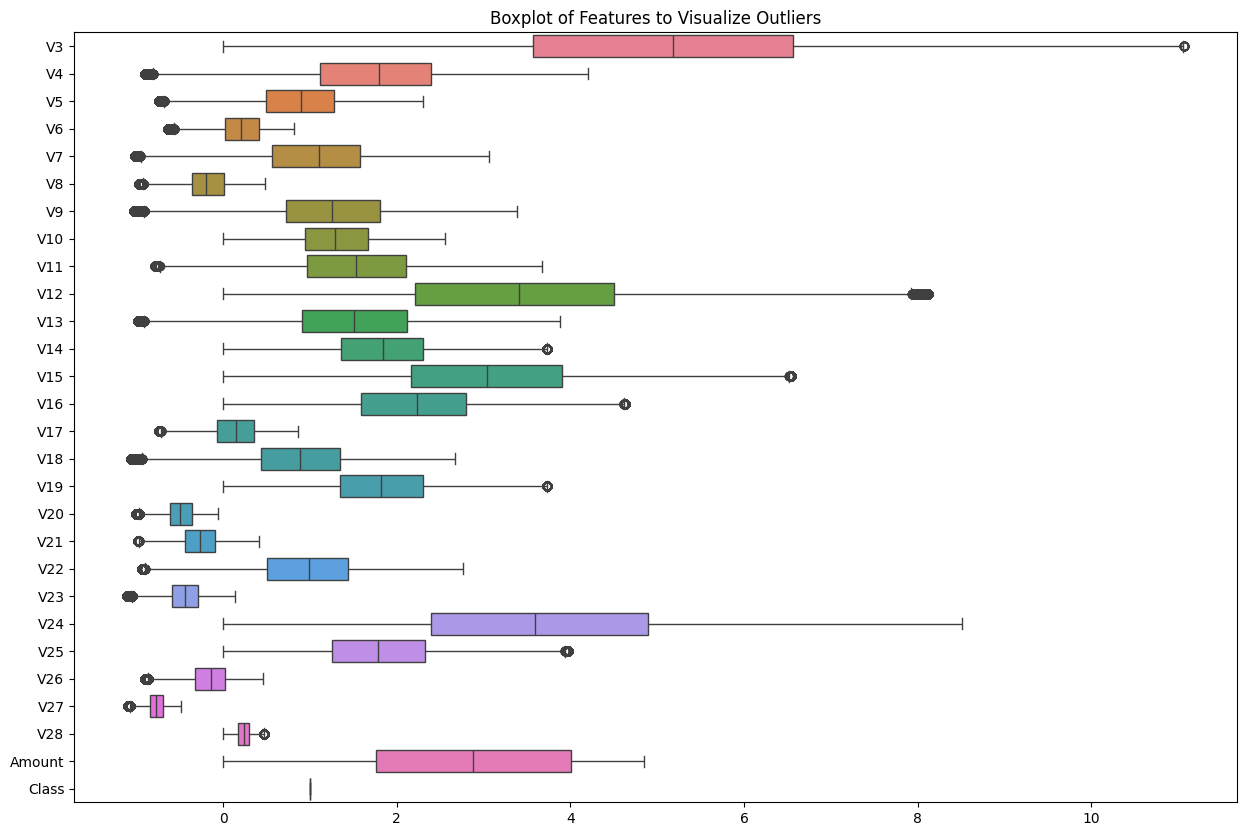

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=cleaned_data.iloc[:, 2:-1], orient="h")
plt.title("Boxplot of Features to Visualize Outliers")
plt.show()


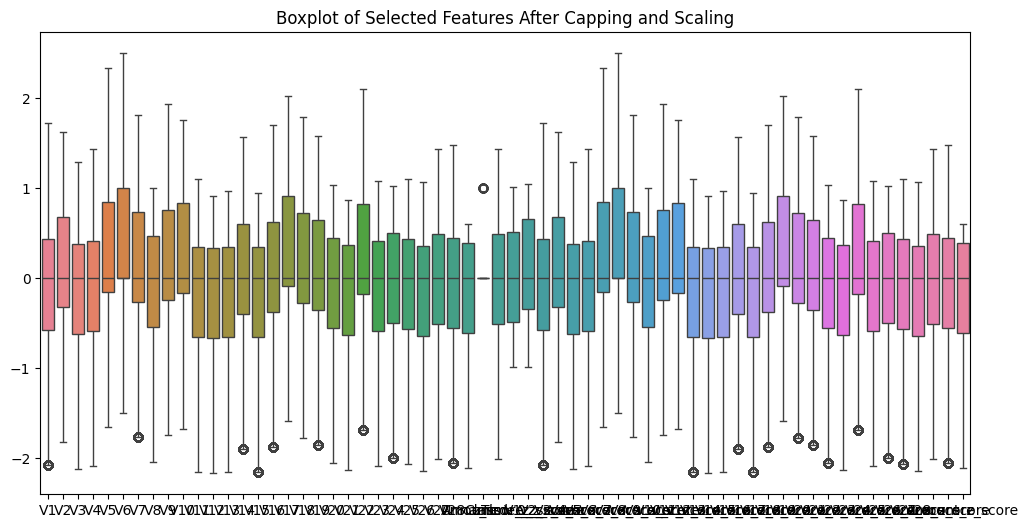

In [95]:
# 2. Visualizing the results using boxplots
selected_features = scaled_data.columns[2:-1]  # Adjust as needed
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data[selected_features])
plt.title('Boxplot of Selected Features After Capping and Scaling')
plt.show()

Skewness Check: We check the skewness of each feature, identifying those with an absolute skewness greater than 0.5, which indicates moderate to high skewness.
Log Transformation: The log1p transformation is applied to these skewed features, but only if all values in the feature are positive. This prevents errors from occurring when the log transformation is applied to non-positive values.
Rechecking Skewness: After the transformation, we recheck the skewness to see the effect of the transformation.

In [48]:
from sklearn.preprocessing import QuantileTransformer
import pandas as pd

# Create QuantileTransformer with normal output distribution
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply the transformation to your dataset (ignoring the target column)
X_transformed = quantile_transformer.fit_transform(cleaned_data.drop('Class', axis=1))

# Create a new DataFrame with the transformed features
df_transformed = pd.DataFrame(X_transformed, columns=cleaned_data.drop('Class', axis=1).columns)

# Add back the 'Class' column
df_transformed['Class'] = cleaned_data['Class'].values  # Use cleaned_data to ensure consistency

# Check the skewness after transformation
skewness_after = df_transformed.skew()
print("Skewness after Quantile Transformation:\n", skewness_after)


Skewness after Quantile Transformation:
 V1        -0.393267
V2        -0.744416
V3        -0.363219
V4         0.609326
V5         0.928730
V6         1.408700
V7         0.266417
V8         0.381336
V9         0.221890
V10       -0.739623
V11        0.015602
V12       -1.790456
V13        0.169065
V14       -0.122377
V15       -0.531114
V16       -0.613771
V17        0.779926
V18       -0.027476
V19       -0.255274
V20        0.773042
V21        0.109401
V22       -0.017943
V23        0.022115
V24       -1.714341
V25       -0.919609
V26        0.598825
V27        0.035591
V28       -0.266641
Amount     1.477427
z_score    0.076071
Class      0.000000
dtype: float64


In [49]:
import pandas as pd

# Assuming df_transformed is your DataFrame after quantile transformation

# Calculate the skewness of each feature
skewness = df_transformed.drop('Class', axis=1).skew()

# Define a threshold for skewness (e.g., absolute value greater than 0.5)
skewed_features = skewness[skewness.abs() > 0.5].index.tolist()


# Print skewed features
print("Skewed Features:\n", skewed_features)


Skewed Features:
 ['V2', 'V4', 'V5', 'V6', 'V10', 'V12', 'V15', 'V16', 'V17', 'V20', 'V24', 'V25', 'V26', 'Amount']


Columns in cleaned_data: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'z_score']
Columns in df_transformed: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'z_score', 'Class']


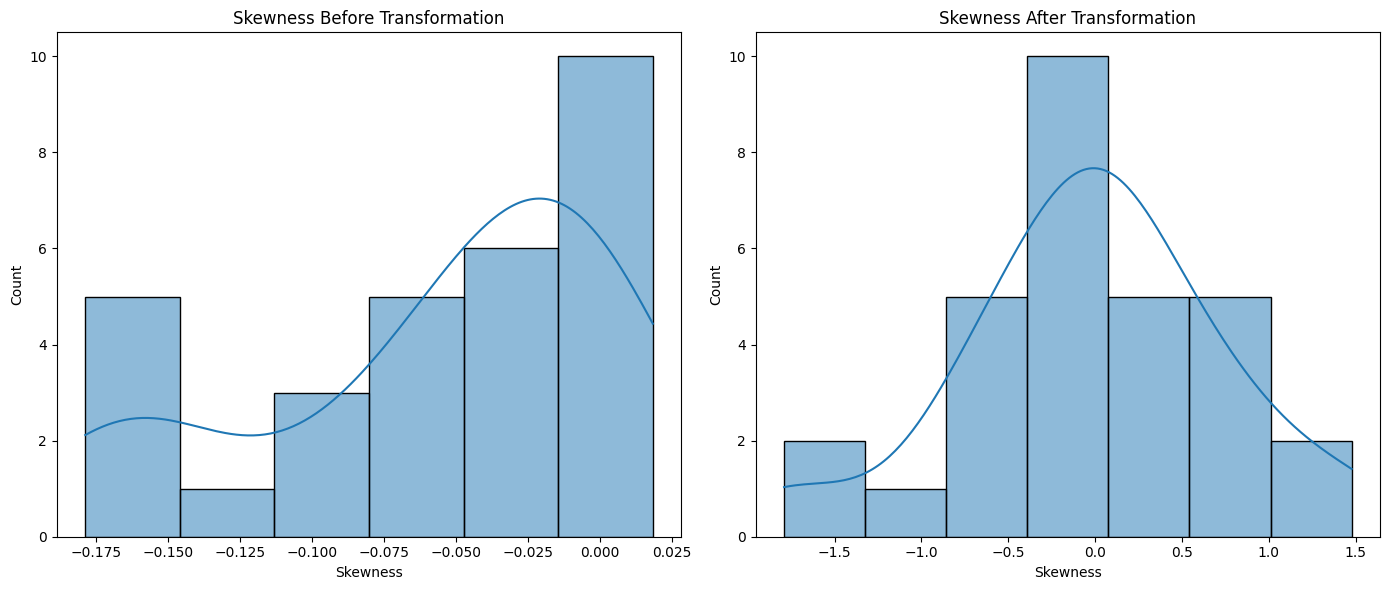

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check columns in cleaned_data
print("Columns in cleaned_data:", cleaned_data.columns.tolist())
# Check columns in df_transformed
print("Columns in df_transformed:", df_transformed.columns.tolist())

# Calculate skewness before transformation
skewed_features = cleaned_data.drop(columns=['Class'], errors='ignore').apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting skewness before and after transformation
plt.figure(figsize=(14, 6))

# Plot before transformation
plt.subplot(1, 2, 1)
sns.histplot(skewed_features, kde=True)
plt.title('Skewness Before Transformation')
plt.xlabel('Skewness')

# Plot after transformation
# Drop 'Class' and check if 'Unnamed: 0' exists before dropping
transformed_skewness = df_transformed.drop(columns=['Class'], errors='ignore').apply(lambda x: x.skew()).sort_values(ascending=False)
plt.subplot(1, 2, 2)
sns.histplot(transformed_skewness, kde=True)
plt.title('Skewness After Transformation')
plt.xlabel('Skewness')

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

# Assuming 'cleaned_data' is your DataFrame
# Calculate the percentage of missing values for each column
missing_percentage = cleaned_data.isnull().mean() * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Percentage': missing_percentage})

# Separate columns into categories based on missing value percentage
missing_df['Category'] = pd.cut(missing_df['Missing Percentage'],
                                  bins=[0, 5, 20, 50, 100],
                                  labels=['Low (0-5%)', 'Medium (5-20%)', 'High (20-50%)', 'Very High (50-100%)'])

# Reset index for better readability (optional)
missing_df.reset_index(inplace=True)
missing_df.rename(columns={'index': 'Column Name'}, inplace=True)

# Display the DataFrame
print(missing_df)


   Column Name  Missing Percentage Category
0           V1                 0.0      NaN
1           V2                 0.0      NaN
2           V3                 0.0      NaN
3           V4                 0.0      NaN
4           V5                 0.0      NaN
5           V6                 0.0      NaN
6           V7                 0.0      NaN
7           V8                 0.0      NaN
8           V9                 0.0      NaN
9          V10                 0.0      NaN
10         V11                 0.0      NaN
11         V12                 0.0      NaN
12         V13                 0.0      NaN
13         V14                 0.0      NaN
14         V15                 0.0      NaN
15         V16                 0.0      NaN
16         V17                 0.0      NaN
17         V18                 0.0      NaN
18         V19                 0.0      NaN
19         V20                 0.0      NaN
20         V21                 0.0      NaN
21         V22                 0

In [55]:
# Mean imputation
df_clean_mean_imputed = cleaned_data.copy()

# Apply mean imputation to the selected columns with missing values
mean_imputed_columns = ['V5', 'V6', 'V12', 'V17', 'V20', 'V23', 'V24', 'V27', 'V28']
for column in mean_imputed_columns:
    df_clean_mean_imputed[column].fillna(df_clean_mean_imputed[column].mean(), inplace=True)

# Verify if any missing values remain
print("Missing values after mean imputation:")
print(df_clean_mean_imputed.isna().sum())



Missing values after mean imputation:
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
z_score    0
dtype: int64


In [52]:
# Median imputation
df_clean_median_imputed = df_clean.copy()

# Apply median imputation to the selected columns with missing values
median_imputed_columns = ['V5', 'V6', 'V12', 'V17', 'V20', 'V23', 'V24', 'V27', 'V28']
for column in median_imputed_columns:
    df_clean_median_imputed[column].fillna(df_clean_median_imputed[column].median(), inplace=True)

# Verify if any missing values remain
print("Missing values after median imputation:")
print(df_clean_median_imputed.isna().sum())


Missing values after median imputation:
Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


In [56]:
# Check for remaining missing values in the mean-imputed dataset
missing_values_mean = df_clean_mean_imputed.isna().sum().sum()
print(f"Total missing values after mean imputation: {missing_values_mean}")

# Check for remaining missing values in the median-imputed dataset
missing_values_median = df_clean_median_imputed.isna().sum().sum()
print(f"Total missing values after median imputation: {missing_values_median}")


Total missing values after mean imputation: 0
Total missing values after median imputation: 0


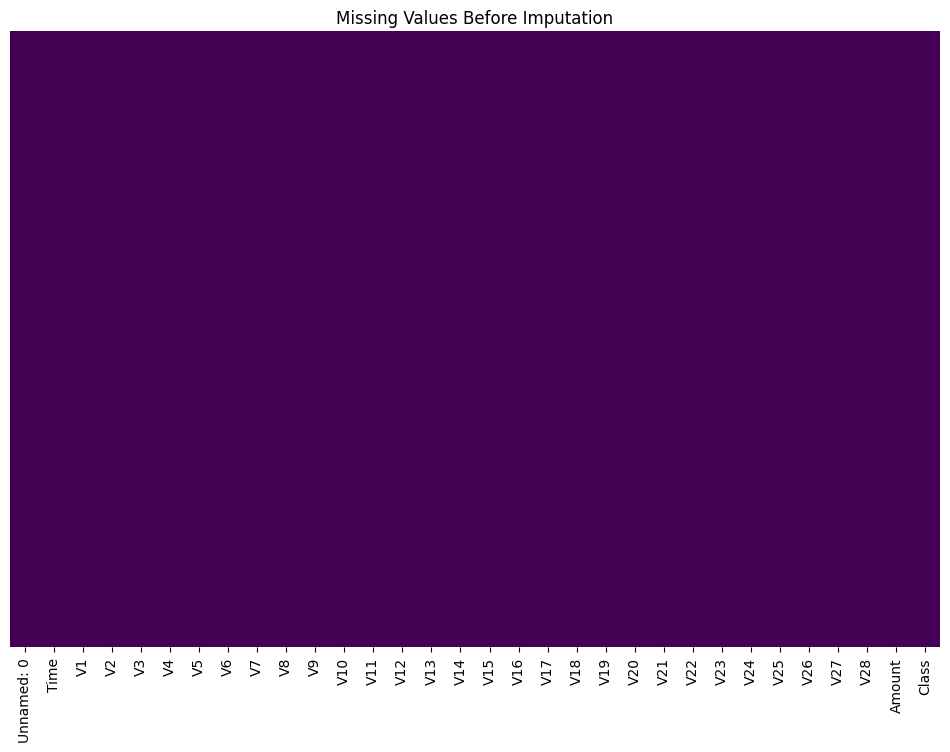

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Before Imputation")
plt.show()


Mean Imputation:
"Mean imputation involves replacing missing values in a dataset with the mean value of the corresponding feature. This method is straightforward and works well when the data is symmetrically distributed. However, it can be sensitive to outliers, as the mean can be skewed by extreme values, potentially leading to less accurate imputations."

Median Imputation:
"Median imputation replaces missing values with the median value of the respective feature. This approach is particularly useful when the data is skewed, as the median is less affected by outliers compared to the mean. Median imputation is often preferred in cases where the data distribution is not symmetrical or when outliers are present

                                        Scale the Features

In [58]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling (excluding the target variable and any non-feature columns)
features_to_scale = df_clean_median_imputed.drop(columns=['Unnamed: 0', 'Class', 'Time'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
df_clean_median_scaled = pd.DataFrame(scaler.fit_transform(features_to_scale), columns=features_to_scale.columns)

# Add the target variable back
df_clean_median_scaled['Class'] = df_clean_median_imputed['Class'].values

# Display the first few rows of the scaled DataFrame
print(df_clean_median_scaled.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.178585 -0.088351  1.890768  1.130920 -0.319425  0.502028  0.264458   
1  0.634638  0.242665  0.056110  0.398518  0.069301  0.005688 -0.143831   
2 -0.898937 -0.198170  1.315293 -0.634283  0.000671  1.217102  0.261906   
3 -1.035345  0.839968  1.126184  0.362984 -0.386636  0.168127  0.717551   
4 -0.514993  0.920821  0.810630 -0.086920  0.421559  0.053644  0.567855   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.048329  0.409829  0.175734  ... -0.007247  0.409788 -0.368162  0.110492   
1  0.023135 -0.223475 -0.157700  ... -0.653254 -0.939349  0.386765 -0.587154   
2  0.564832 -1.380825 -0.012795  ... -0.287466  0.008563 -0.652814 -2.020488   
3 -0.635856  0.874111  1.032420  ...  0.020391  1.175897 -0.464360  0.237989   
4  0.347805 -0.543850 -0.422142  ... -0.598696 -0.823283 -0.068432 -0.641317   

        V25       V26       V27       V28    Amount  Class  
0  0.25

df_clean_median_scaled looks good! Each feature (excluding the target variable Class) has been standardized, which means that they now have a mean of 0 and a standard deviation of 1. This scaling helps ensure that all features contribute equally to the model's performance, 

In [59]:
print(df_clean_median_scaled.isnull().sum())


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


                                                # EDA

##1.Visualize Target Variable Distribution:
-Use a Count Plot or Bar Plot to see the distribution of classes in your target variable.


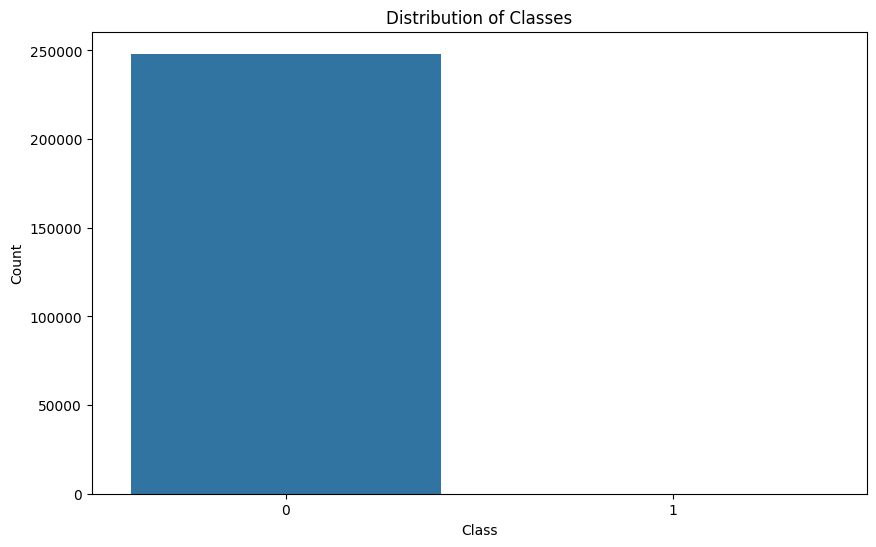

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df_clean_median_scaled)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


#2.Visualize Feature Distributions:
-Use Histograms and KDE plots to visualize the distribution of individual features.

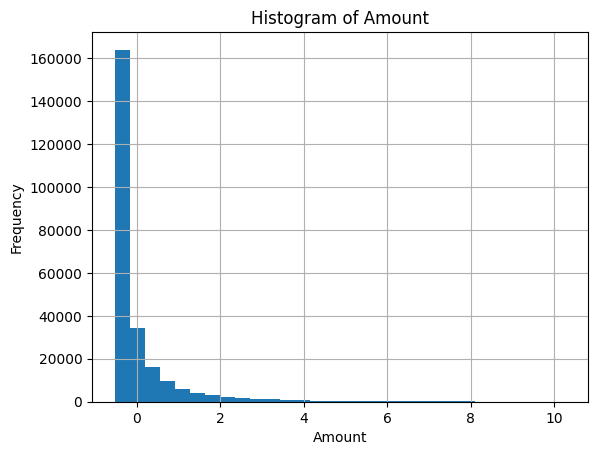

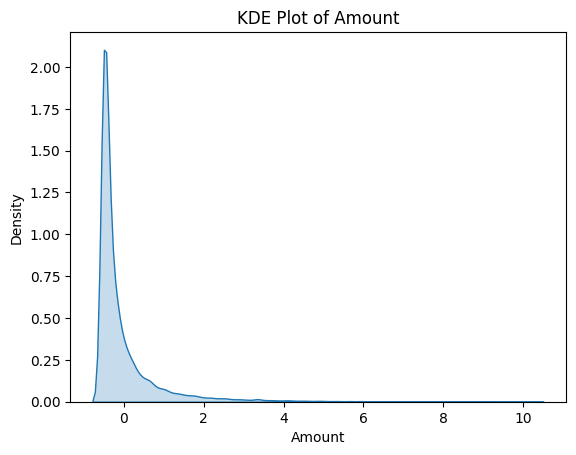

In [61]:
df_clean_median_scaled['Amount'].hist(bins=30)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(df_clean_median_scaled['Amount'], fill=True)
plt.title('KDE Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()


#3.Boxplots:

-Use Boxplots to identify outliers in your features

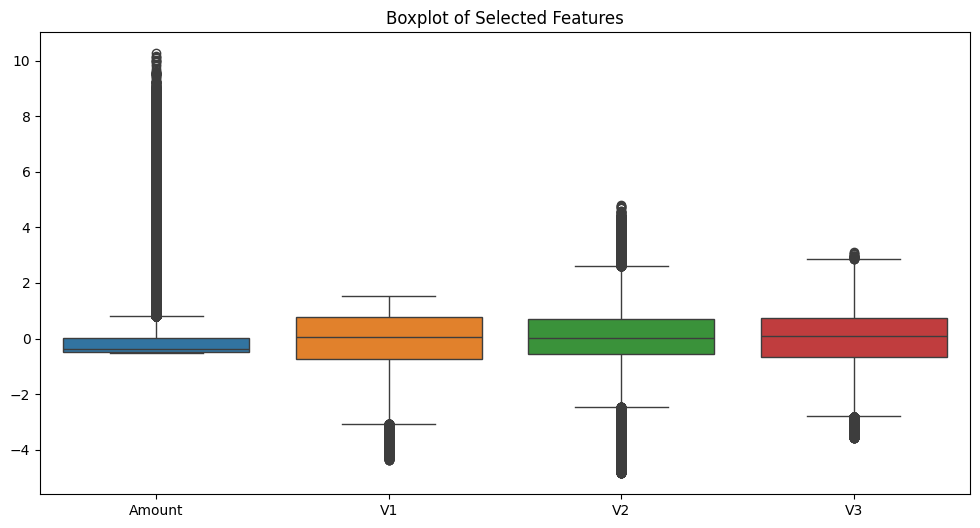

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean_median_scaled[['Amount', 'V1', 'V2', 'V3']])
plt.title('Boxplot of Selected Features')
plt.show()


#4.Heatmap Correlation:

-Use a Heatmap to visualize the correlation between features

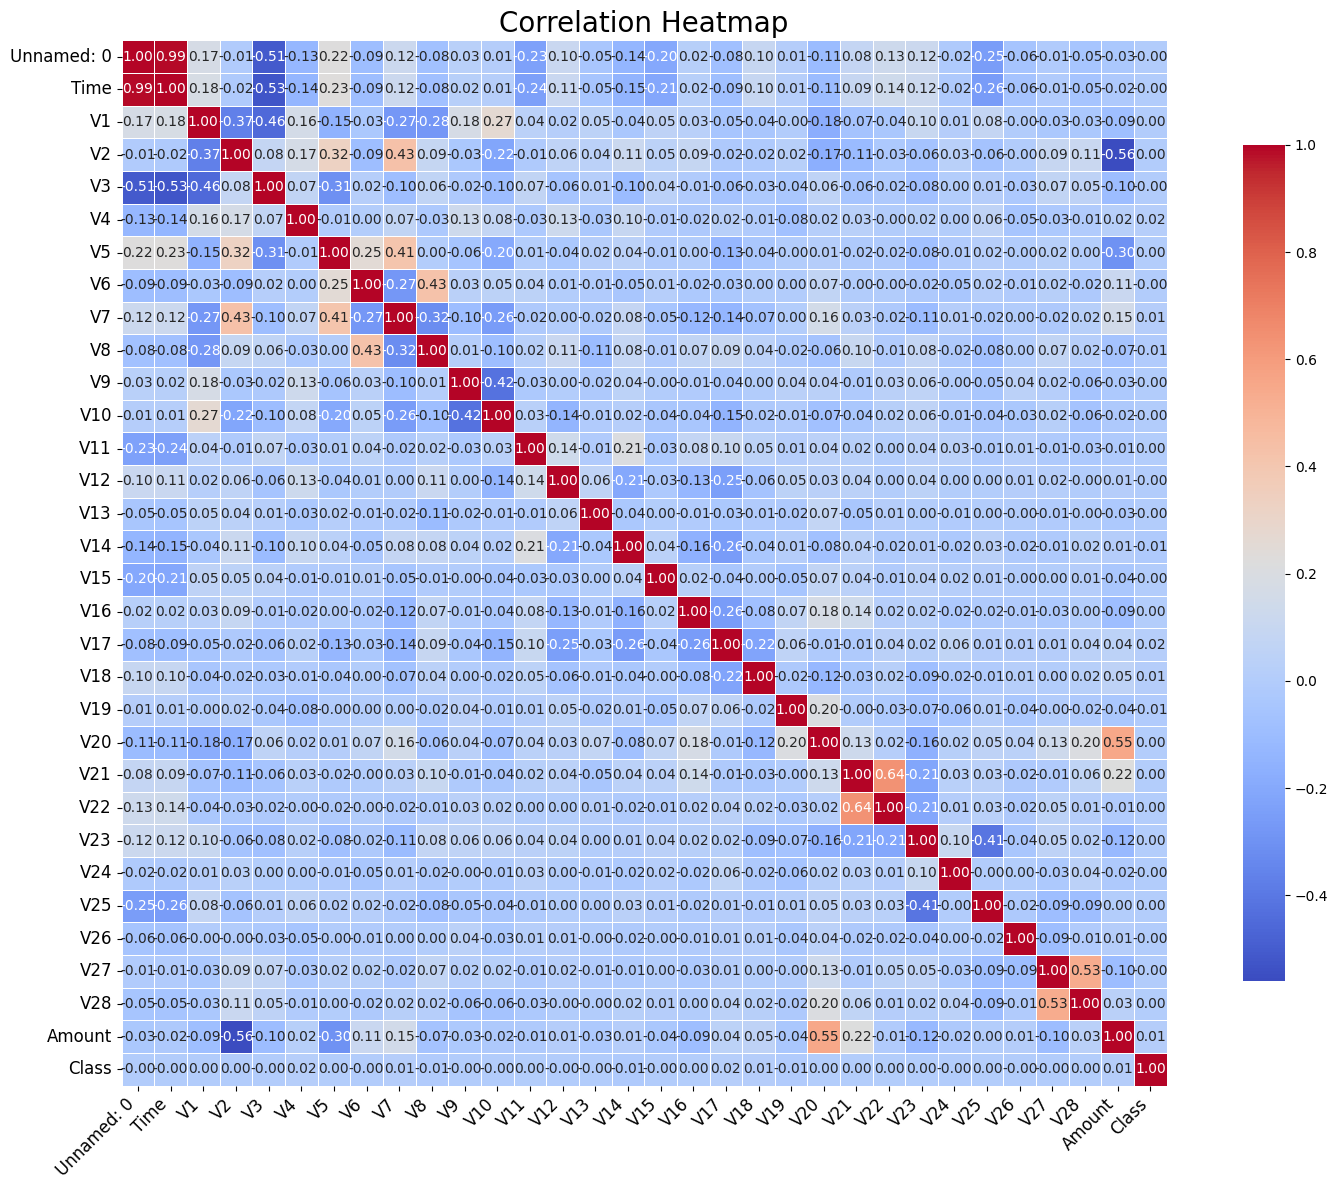

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_clean is your cleaned DataFrame
correlation_matrix = df_clean.corr()

# Set the figure size for better visibility
plt.figure(figsize=(16, 12))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10})  # Adjust the annotation font size

# Add title and labels
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels for better visibility
plt.yticks(rotation=0, fontsize=12)  # Adjust y-tick labels

# Show the heatmap
plt.tight_layout()
plt.show()


In [45]:
print(df_clean_median_scaled[['V1', 'V2', 'Amount']].dtypes)


V1        float64
V2        float64
Amount    float64
dtype: object


In [64]:
print(df_clean_median_scaled.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df_clean_median_scaled.isnull().sum())

# Pairplot for V1, V2, and Amount, colored by Class
sns.pairplot(df_clean_median_scaled, hue='Class', vars=['V1', 'V2', 'Amount'])
plt.suptitle("Pair Plot of V1, V2, and Amount Colored by Class", y=1.02)
plt.show()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027FDBDE0720> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

#6.Pie Diagram:

-Use a Pie Chart for a visual representation of the class distribution

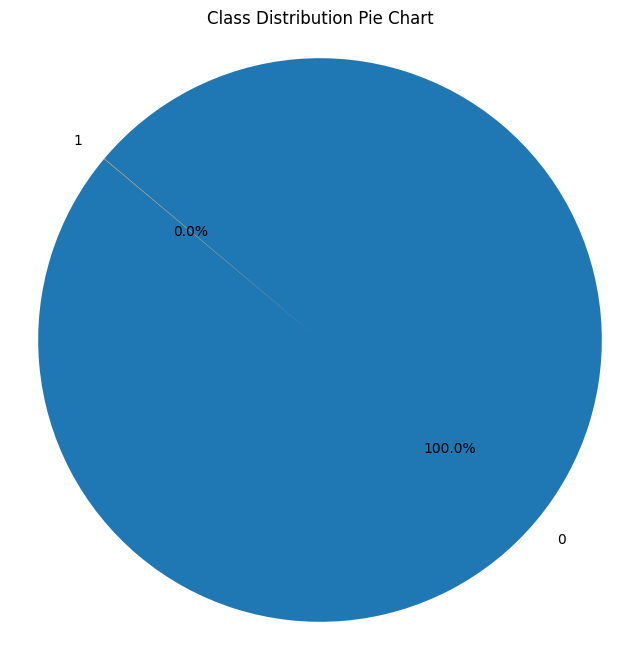

In [65]:
class_distribution = df_clean_median_scaled['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#7.Line Plot:

-If we have a time series feature, use a Line Plot to show trends over time

In [71]:
# Display class counts
class_counts = df_clean_median_scaled['Class'].value_counts()
print(class_counts)

Class
0    248122
1        49
Name: count, dtype: int64


 it's clear that your dataset is highly imbalanced, with a significant majority of samples belonging to class 0 (248,122 instances) and only a tiny minority in class 1 (49 instances). This level of imbalance can lead to poor model performance, as the model may become biased toward predicting the majority class. 
 Technique to Address Class Imbalance:
 -Oversampling:
-Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class.

In [66]:
# Check for missing values in the dataset
print(df_clean_median_scaled.isnull().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
# Separate features and target
X = df_clean_median_scaled.drop(columns='Class')
y = df_clean_median_scaled['Class']

smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_final, y_resampled_final = rus.fit_resample(X_resampled, y_resampled)



In [68]:
print(y_resampled_final.value_counts())


Class
0    248122
1    248122
Name: count, dtype: int64


i successfully balanced the classes in your dataset using SMOTE, as both classes (0 and 1) now have an equal count of 248,122 instances.

                                               #Feature engineering

                ##1. Identify Categorical Features

In [69]:

categorical_features = df_clean_median_scaled.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features)


Categorical Features: []


 there are no categorical features in your dataset (categorical_features = []), there is no need for encoding

                           #Split Data into Training and Testing Sets

In [70]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_clean_median_scaled.drop(columns='Class')
y = df_clean_median_scaled['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (198536, 29)
Testing set shape: (49635, 29)


                                        #Feature Selection

For Feature Selection, you can employ several methods, including using Random Forest to assess feature importance and SelectKBest to identify the top features based on statistical tests

                    ##1. Using Random Forest for Feature Importance
Random Forest can help you understand the importance of each feature in predicting the target variable.

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Display the sorted feature importance
print(feature_importance_df)



KeyboardInterrupt: 

                         ##2. Using Select K Best for Feature Selection
Select K Best selects the best features based on statistical tests.

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # for classification tasks

# Select K best features
k = 10  # You can adjust this value based on your needs
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features_kbest = X.columns[selected_indices].tolist()

print("Selected Features using Select K Best:", selected_features_kbest)


Selected Features using Select K Best: ['V4', 'V7', 'V8', 'V12', 'V14', 'V17', 'V18', 'V19', 'V25', 'Amount']


                                        #Build the ML Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9997985292636244
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49625
           1       0.00      0.00      0.00        10

    accuracy                           1.00     49635
   macro avg       0.50      0.50      0.50     49635
weighted avg       1.00      1.00      1.00     49635

--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.9873274906819784
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     49625
           1       0.00      0.20      0.01        10

    accuracy                           0.99     49635
   macro avg       0.50      0.59      0.50     49635
weighted avg       1.00      0.99      0.99     49635

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9997985292636244
              precision    recall  f1-score   support

           0       1.00      1.00  

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an empty dictionary to store model performance metrics
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
     
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store performance metrics
    model_performance[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred
    }
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print(model_performance[name]['classification_report'])
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9997985292636244
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49625
           1       0.00      0.00      0.00        10

    accuracy                           1.00     49635
   macro avg       0.50      0.50      0.50     49635
weighted avg       1.00      1.00      1.00     49635

--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.9873274906819784
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     49625
           1       0.00      0.20      0.01        10

    accuracy                           0.99     49635
   macro avg       0.50      0.59      0.50     49635
weighted avg       1.00      0.99      0.99     49635

--------------------------------------------------


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Visualize confusion matrices for each model
for name, metrics in model_performance.items():
    plot_confusion_matrix(metrics['confusion_matrix'], title=f'{name} Confusion Matrix')


In [ ]:
# Function to plot ROC curve
def plot_roc_curve(model, X, y):
    # Get predicted probabilities
    y_probs = model.predict_proba(X)[:, 1]
    

In [ ]:
# Calculate ROC curve
    fpr, tpr, _ = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# Visualize ROC curves for each model
for name, model in models.items():
    plot_roc_curve(model, X_test, y_test)

                                      #hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the best model on the full training data
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
print("Optimized Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
